![Plane Picture](./Images/new_file.png) 

# Aviation Enterprise Risk Analysis

**Author:** Nelson Kamau

## Project Overview.

The company is expanding into aviation and needs to identify the lowest-risk aircraft for commercial and private operations. This analysis will assess accident data, survival rates, and key aircraft characteristics to guide data-driven acquisition decisions.

The project will evaluate accident frequency over time and determine which aircraft models have the fewest incidents. Survival rates will be analyzed to assess safety during accidents, with comparisons based on aircraft make, model, engine type, and number of engines. Additional risk factors, such as amateur-built status and aircraft damage levels, will be examined to provide a comprehensive safety profile.

Beyond the aircraft themselves, environmental and operational factors will also be considered. The impact of weather conditions and accident trends during different flight phases will offer deeper insights into potential risks.

## Business Problem
  The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Description
Dataset Description for Aviation Risk Analysis
#### 1. Data Source and Relevance
The dataset used in this project is a dataset from the National Transportation Safety Board , containing over 90,000 records of past aviation incidents. It includes details on the aircraft type, flight conditions, location, severity, and investigative conclusions. These data points are crucial in answering our research questions, as they allow us to identify patterns in aviation risks and assess aircraft safety.


#### 2. What the Data Represent
The dataset represents historical aviation accident reports, documenting incidents involving various aircraft models across different conditions. The sample includes both commercial and private flights, with records spanning multiple decades. Each row in the dataset corresponds to a single aviation incident, with key variables including:

    Aircraft details: Model, manufacturer, number of engines, amateur-built status
    Incident details: Date, location, phase of flight, severity of damage
    Weather and environmental factors: Weather conditions at the time of the incident
    Impact on passengers: Fatalities, injuries, survival rates
    Investigative conclusions: Whether a probable cause was determined
    

#### 3. Target Variable
Since the goal is to analyze aircraft safety and risk, multiple outcome variables will be used depending on the specific question that have been identified today:

    Survival rate per aircraft model (to find low-risk aircraft)
    Aircraft.damage (to determine aircraft loss probability)

#### 4. Properties of Key Variables
We will use a combination of categorical, numerical, and time-based variables:

    Categorical Variables: Aircraft model, country, flight purpose, amateur-built status
    Numerical Variables: Number of engines, total fatalities, total injuries
    Date-Based Variables: Event date (to analyze seasonal trends)

## Data Understanding

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data_df=pd.read_csv('.\data\Aviation_Data.csv')
data_df

First we can get a glimpse of the data. look into the first 5 rows of the dataset.

In [6]:
data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
data_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

From this we deduce data has different types being float, str and nan value. We then take a deeper look at the data that is in the columns. To see the amount of Nan values and the number of rows, which is ultimately the data, we have. This also gives us a view of the columns and how much data is missing from each

In [8]:
data_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We now look into the different columns to get a better view of the data including the values and what insight
we can get from the values. We look at the different columns and the values within.

In [10]:
data_df['Country'].value_counts().head()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Name: Country, dtype: int64

In [11]:
data_df["Location"].value_counts().head()

ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: Location, dtype: int64

In [12]:
data_df['Investigation.Type'].value_counts().head()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
Name: Investigation.Type, dtype: int64

In [14]:
data_df['Airport.Name'].value_counts()

Private                     240
PRIVATE                     224
Private Airstrip            153
NONE                        146
PRIVATE STRIP               111
                           ... 
WERSTERLY STATE               1
TETON PEAKS/DRIGGS MUNI/      1
San Juan Pueblo NM            1
Denver Internationl           1
MCAS Camp Pendleton           1
Name: Airport.Name, Length: 24871, dtype: int64

In [16]:
data_df['Injury.Severity'].value_counts().head()

Non-Fatal    67357
Fatal(1)      6167
Fatal         5262
Fatal(2)      3711
Incident      2219
Name: Injury.Severity, dtype: int64

In [18]:
data_df['Purpose.of.flight'].value_counts(dropna=False)


Personal                     49448
Instructional                10601
NaN                           7651
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [23]:
data_df['Report.Status'].value_counts().head()

Probable Cause                                                                  61754
Foreign                                                                          1999
<br /><br />                                                                      167
Factual                                                                           145
The pilot's failure to maintain directional control during the landing roll.       58
Name: Report.Status, dtype: int64

In [26]:
data_df[data_df["Report.Status"].str.len() > 100]["Report.Status"].sample(10)


78150    A partial loss of engine power shortly after t...
67103    The delay by both pilots to abort the takeoff ...
83715    The student pilot's failure to maintain direct...
69377    The pilot's failure to recognize the onset of ...
64082    The flight attendant's inadvertent slip on the...
82178    The pilots improper landing flare during a so...
68803    The pilots failure to maintain adequate airsp...
65113    A loss of engine power due to carburetor icing...
85063    The pilot's unstable approach and delayed deci...
80489    The prospective pilots improper landing flare...
Name: Report.Status, dtype: object

In [21]:
data_df["Weather.Condition"].value_counts(normalize=True)*100

VMC    91.594488
IMC     7.080820
UNK     1.014254
Unk     0.310438
Name: Weather.Condition, dtype: float64

In [15]:
data_df['Airport.Name'].isna().mean()*100

41.57037233807057

In [19]:
data_df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [25]:
data_df['Report.Status'].isna().value_counts()

False    82508
True      7840
Name: Report.Status, dtype: int64

In [27]:
data_df['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [28]:
data_df['FAR.Description'].isna().mean()*100

64.55593925709479

In [29]:
data_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [30]:
data_df['Purpose.of.flight'].isna().mean()*100

8.468366759640501

In [31]:
data_df["Country"].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Mauritania            1
Benin                 1
Chad                  1
Liberia               1
Nauru                 1
Name: Country, Length: 219, dtype: int64

In [32]:
data_df['Country'].nunique()

219

In [33]:
data_df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [34]:
data_df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [35]:
data_df['Engine.Type'].isna().sum()

8536

In [36]:
data_df["Investigation.Type"].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
05-04-2021        1
31-03-2021        1
05-08-2022        1
04-03-2021        1
04-08-2021        1
Name: Investigation.Type, Length: 71, dtype: int64

In [37]:
data_df[data_df.duplicated(keep=False)]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_df[data_df.duplicated(keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 64030 to 90097
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                0 non-null      object 
 1   Investigation.Type      1447 non-null   object 
 2   Accident.Number         0 non-null      object 
 3   Event.Date              0 non-null      object 
 4   Location                0 non-null      object 
 5   Country                 0 non-null      object 
 6   Latitude                0 non-null      object 
 7   Longitude               0 non-null      object 
 8   Airport.Code            0 non-null      object 
 9   Airport.Name            0 non-null      object 
 10  Injury.Severity         0 non-null      object 
 11  Aircraft.damage         0 non-null      object 
 12  Aircraft.Category       0 non-null      object 
 13  Registration.Number     0 non-null      object 
 14  Make                    0 non-null 

In [39]:
data_df['Make'].value_counts().head(10)

Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: Make, dtype: int64

## Data Preparation

### Data Cleaning

The duplicates that were noted all have all Nan values except for one column seems like the
data was inputed wrongly. The duplicated rows thus provide no data that would help with our analysis thus we drop the duplicates. This gives a new shape for our dataset.


In [41]:
data_df=data_df.drop_duplicates()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Still looking into the data there are columns that have null values that are too high and they would cause the 
analysis to be skewed or dont have enough data for our analysis. Schedule, Air Carrier and Far Description all have 
above 60% null values thus we drop them because of this.

In [42]:
data_df=data_df.drop(columns=['Schedule', 'Air.carrier', 'FAR.Description'])

In [43]:
data_df['Make'] = data_df['Make'].str.title()
data_df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'James R Dernovsek',
       'Orlican S R O', 'Royse Ralph L'], dtype=object)

### Feature Engineering

It is noted that there are certain values in the make column that are duplicated however are the same. they are in different capitalization formats or have multiple names but all represent the same aeroplane make company. I therefore standardized them to ensure i am able to do an analysis of the proper make and model and not split makes that may be from the same category.

In [50]:
# Define a mapping for known manufacturers in sentence case
make_standardized = {
    'Cessna': 'Cessna',
    'Piper': 'Piper',
    'Boeing': 'Boeing',
    'Bell': 'Bell',
    'Beech':'Beech', 
    'Airbus': 'Airbus',
    'Bombardier': 'Bombardier'
}

#Then iterate over the DataFrame and ensure the values are made standard
for key, value in make_standardized.items():
    data_df.loc[data_df['Make'].str.contains(key,case=False, na=False), 'Make'] = value

print(data_df['Make'].value_counts()) 

Cessna              27215
Piper               14946
Beech                5462
Bell                 3893
Boeing               2833
                    ...  
Mareik-Bensen           1
Duke Paul               1
Shultz Jeffrey D        1
Woodrow Larry W         1
Vermeys                 1
Name: Make, Length: 7450, dtype: int64


For the task ahead as we are analysing an accident dataset we need new columns. We need to know the survival rate of the various planes we are investigating and to do that we need to know the total occupancy of the planes. this is calculted below.

In [51]:
#Calculate total occupants & survival rate
data_df["Total_Occupants"] =(data_df["Total.Fatal.Injuries"] + data_df["Total.Serious.Injuries"] + data_df["Total.Minor.Injuries"] 
    + data_df["Total.Uninjured"])

data_df["Survival_Rate"] = data_df["Total.Uninjured"] / data_df["Total_Occupants"]
data_df["Survival_Rate"] = data_df["Survival_Rate"] * 100
data_df["Survival_Rate"].fillna(0, inplace=True)


In [52]:
data_df['Survival_Rate'].describe()

count    88958.000000
mean        47.779963
std         48.834700
min          0.000000
25%          0.000000
50%          5.882353
75%        100.000000
max        100.000000
Name: Survival_Rate, dtype: float64

I also added a "accident_count" column for easier summation of the number of incidences that occur.

In [54]:
# Each row is one accident
data_df['accident_count'] = 1


I also created a column for the year that the incidents happened. I got this from the Event Date column to be precise. This column would allow to create a time-series plot to check on trends.

In [102]:
# Convert event date column to datetime

data_df['Event_Date'] = pd.to_datetime(data_df['Event.Date'], errors='coerce')

# Extract the year from the event date

data_df['Accident_Year'] = data_df['Event_Date'].dt.year

# Drop rows where Accident_Year is NaN before converting to integer
data_df = data_df.dropna(subset=['Accident_Year'])
data_df['Accident_Year'] = data_df['Accident_Year'].astype(int)

print(data_df['Accident_Year'].describe())


1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2022    1607
2015    1582
2013    1561
2021    1545
2014    1535
2020    1392
1979       2
1977       1
1948       1
1981       1
1962       1
1974       1
Name: Accident_Year, dtype: int64


<ipython-input-102-20eed88e5cc4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Accident_Year'] = data_df['Accident_Year'].astype(int)


In [57]:
#create column that combines the make and the model for easier filtering
data_df["Plane"] = data_df["Make"] + " " + data_df["Model"]

In [58]:
data_df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

Also noted that the Engine type column has values that are in the same category so i standardized that also.

In [59]:
engine_standardized = {
    'Unknown': 'Unknown',
    'None': 'Unknown'
}


for key, value in engine_standardized.items():
    data_df.loc[data_df['Engine.Type'].str.contains(key,case=False, na=False), 'Engine.Type'] = value
    
data_df.loc[data_df['Engine.Type'].isin(['None', 'Unknown']), 'Engine.Type'] = 'Unknown'

print(data_df['Engine.Type'].value_counts()) 

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2072
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64


In [60]:
data_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

Noted that Purpose of flight has data which are in the same category that may cause improper analysis. This column was also standardized.

In [61]:
# Merge purposes that seem similar
data_df['Purpose.of.flight'] = data_df['Purpose.of.flight'].replace({
    'Air Race/show': 'Air Race show'
})
public_aircraft_categories = {
    'Public Aircraft - Federal': 'Public Aircraft',
    'Public Aircraft - Local': 'Public Aircraft',
    'Public Aircraft - State': 'Public Aircraft'
}
data_df['Purpose.of.flight'] = data_df['Purpose.of.flight'].replace(public_aircraft_categories)
print(data_df['Purpose.of.flight'].value_counts())

Personal               49448
Instructional          10601
Unknown                 6802
Aerial Application      4712
Business                4018
Positioning             1646
Other Work Use          1264
Public Aircraft          963
Ferry                    812
Aerial Observation       794
Executive/corporate      553
Flight Test              405
Skydiving                182
Air Race show            158
External Load            123
Banner Tow               101
Glider Tow                53
Firefighting              40
Air Drop                  11
ASHO                       6
PUBS                       4
PUBL                       1
Name: Purpose.of.flight, dtype: int64


##  Data Analysis

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Survival Rate Analysis

The first analysis that I undertook was checking the top 10 aeroplane makes with the highest survival rate meaning the most uninjured passengers in the event of an accident.
The analysis provided this list with the accompanying survival rate:

    1. Piaggio - 95%
    2. Cub Crafters Inc - 95%
    3. American Legend Aircraft Co - 88%
    4. Evektor-Aerotechnik As - 81%
    5. Aviat Aircraft Inc - 78%
    6. Costruzioni Aeronautiche Tecna - 76%
    7. Snow - 75%
    8. Thrush Aircraft Inc - 75%
    9. Ultramagic - 72%
    10. Helio - 71%

In [63]:
# Group by Make and compute the average survival rate
make_survival = data_df.groupby('Make')['Survival_Rate'].mean().reset_index()

# Sort by survival rate in descending order
make_survival = make_survival.sort_values(by='Survival_Rate', ascending=False)
make_survival['Survival_Rate']= make_survival['Survival_Rate']
make_survival = stats_make[stats_make["Event.Id"] >= 5] # ensure we analyse ones with multiple incidents

# Display top 10 makes with highest survival rate
make_survival.head(10)

,Make,Survival_Rate,Total.Fatal.Injuries,Event.Id
5132,Piaggio,95.000000,0.0,10
1529,Cub Crafters Inc,95.000000,0.0,20
286,American Legend Aircraft Co,88.235294,0.0,17
2151,Evektor-Aerotechnik As,81.666667,2.0,30
450,Aviat Aircraft Inc,78.571429,7.0,77
1447,Costruzioni Aeronautiche Tecna,76.470588,4.0,34
6249,Snow,75.757576,4.0,33
6713,Thrush Aircraft Inc,75.000000,1.0,12
6871,Ultramagic,72.167000,0.0,14
3023,Helio,71.668008,17.0,113


The analysis while giving info was insufficient as the various makes of aeroplanes contained multiple models and further investigation on specific models of the plane companies would prove more effective in giving the planes with the highest survival rate.
This entailed grouping the data according to the make and model then comparing it to the survival rate. As expected the analysis gave models that were not specifically represented in the above analysis. 
The analysis also showed the need to incoporate the need for multiple incidents for analysis hence filtering was done as shown below.

In [64]:
stats_make_model= data_df.groupby(["Make", 'Model']).agg({
    "Survival_Rate": "mean",
    "Total.Fatal.Injuries": "sum",
    "Event.Id": "count"  # proxy for incident count
}).reset_index()
# Filter out small-sample
stats_make_model = stats_make_model[stats_make_model["Event.Id"] >= 10]  # ensure we analyse ones with multiple incidents
# Rank by Survival Rate
stats_make_model.sort_values("Survival_Rate", ascending=False, inplace=True)

In [65]:
stats_make_model.head(10)

,Make,Model,Survival_Rate,Total.Fatal.Injuries,Event.Id
6571,Diamond Aircraft Ind Inc,DA 20 C1,100.000000,0.0,11
7145,Embraer,EMB145,98.990296,0.0,12
3166,Boeing,737 7H4,93.344959,1.0,16
3097,Boeing,727-224,92.478891,131.0,14
13268,Piper,PA-18A 150,91.666667,0.0,12
3095,Boeing,727-223,90.339169,141.0,18
14742,Rockwell International,114,90.000000,2.0,10
3417,Boeing,767-332,89.846724,0.0,11
7477,Evektor-Aerotechnik As,SPORTSTAR,89.473684,0.0,19
3183,Boeing,737-222,89.341509,78.0,15


As noted above due to the need to ensure analysis was done on multiple stages of data, I increased the criteria from top 10 to top 20 to ensure enough data was analyzed to allow for a more informed decision making process.
The analysis done below showed that the top 20 planes had a survival rate ranging from 100% to 80% which is quite high and would offer confidence to customers if these were the planes that were in the portfolio.

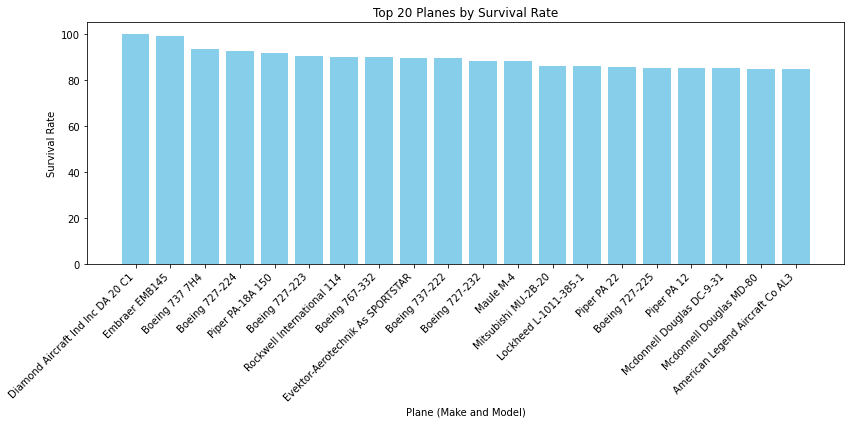

In [66]:
# Calculate group size for each Make/Model 
group_sizes = data_df.groupby(["Make", "Model"]).size().reset_index(name="incident_count")

# Group by Make and Model and compute the average Survival_Rate for each plane type
survival_by_plane = data_df.groupby(["Make", "Model"], as_index=False)["Survival_Rate"].mean()

# Merge the group size information with the survival rate according to make and model
survival_by_plane = survival_by_plane.merge(group_sizes, on=["Make", "Model"])

# Filter out plane types with fewer incidents to ensure proper analysis.
survival_by_plane = survival_by_plane[survival_by_plane["incident_count"] >= 10]

# Sort the groups in descending order by Survival_Rate and take the top 20
top20_survival = survival_by_plane.sort_values("Survival_Rate", ascending=False).head(20)


# Create a new column for the combined label of Make and Model for the x-axis
top20_survival["Plane"] = top20_survival["Make"] + " " + top20_survival["Model"]

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar(top20_survival["Plane"], top20_survival["Survival_Rate"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Plane (Make and Model)")
plt.ylabel("Survival Rate")
plt.title("Top 20 Planes by Survival Rate")
plt.tight_layout()
plt.show()


The Top 20 list with the corresponding survival rate can be seen below.

In [67]:
top20_survival

,Make,Model,Survival_Rate,incident_count,Plane
6571,Diamond Aircraft Ind Inc,DA 20 C1,100.000000,11,Diamond Aircraft Ind Inc DA 20 C1
7145,Embraer,EMB145,98.990296,12,Embraer EMB145
3166,Boeing,737 7H4,93.344959,16,Boeing 737 7H4
3097,Boeing,727-224,92.478891,14,Boeing 727-224
13268,Piper,PA-18A 150,91.666667,12,Piper PA-18A 150
3095,Boeing,727-223,90.339169,18,Boeing 727-223
14742,Rockwell International,114,90.000000,10,Rockwell International 114
3417,Boeing,767-332,89.846724,11,Boeing 767-332
7477,Evektor-Aerotechnik As,SPORTSTAR,89.473684,19,Evektor-Aerotechnik As SPORTSTAR
3183,Boeing,737-222,89.341509,15,Boeing 737-222


From the analysis above further investigation I undertook to be able to rank the top 10 planes but incorporate the data on Aircraft damage. This would allow to show planes that are in an accident are able to ensure high survival rate and also mitigate the damage to the plane for possible reduced repair costs which would directly affect the insurance premiums.
I used the list generated from above with the Top 20 list and analysed the condition the planes were in after accidents. Substantial damage was the common trope that was noted in the list.

<Figure size 864x504 with 0 Axes>

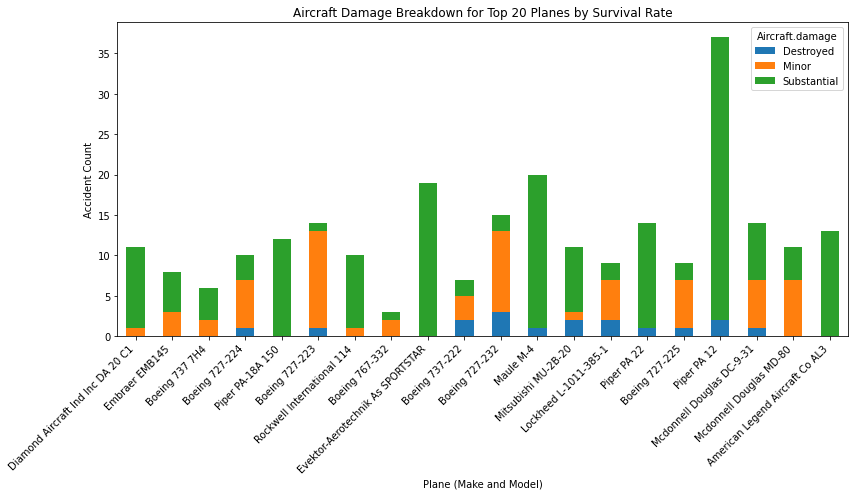

In [69]:
top20_planes = top20_survival["Plane"].tolist()


# Filter the main DataFrame to include only the top 20 planes according to the survival rate
filtered_data = data_df[data_df["Plane"].isin(top20_planes)]

# Group by Plane and Aircraft.damage and sum the accident counts
damage_stats = filtered_data.groupby(["Plane", "Aircraft.damage"], as_index=False)["accident_count"].sum()

# Pivot the table so that rows are planes and columns are damage categories
pivot_damage = damage_stats.pivot(index="Plane", columns="Aircraft.damage", values="accident_count").fillna(0)

# sort the rows to match the order in the previous top20_survival df
pivot_damage = pivot_damage.reindex(top20_planes)

# Plot a stacked bar chart
plt.figure(figsize=(12,7))
pivot_damage.plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel("Plane (Make and Model)")
plt.ylabel("Accident Count")
plt.title("Aircraft Damage Breakdown for Top 20 Planes by Survival Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

After plotting the list I did a ranking with the list to furthermore look for the plane with high survival rate while being able to ensure there was minor damage to the plane and onward to planes with less substantial damage acount and finally planes that were fully destroyed ranked in the last group

In [72]:
#Sort the data so that we can see the planes in top 20 with highest minor damage first, less substantial damage second 
# and less fully damaged last 
top20_sorted_by_damage = pivot_damage.sort_values(
    by=["Minor", "Substantial", "Destroyed"],
    ascending=[False, True, True]
)

top20_sorted_by_damage

Aircraft.damage,Destroyed,Minor,Substantial
Plane,,,
Boeing 727-223,1.0,12.0,1.0
Boeing 727-232,3.0,10.0,2.0
Mcdonnell Douglas MD-80,0.0,7.0,4.0
Boeing 727-225,1.0,6.0,2.0
Boeing 727-224,1.0,6.0,3.0
Mcdonnell Douglas DC-9-31,1.0,6.0,7.0
Lockheed L-1011-385-1,2.0,5.0,2.0
Boeing 737-222,2.0,3.0,2.0
Embraer EMB145,0.0,3.0,5.0


### Operational Analysis.

Did analysis focusing on operational side of the aviation business.
Began by undertaking a plot to show the various Flight Purposes that were noted in the various accidents. then analysed to see the various flight purposes that resulted in higher accident count. This will inform the company when selecting the specific flight purposes that they will offer services for.

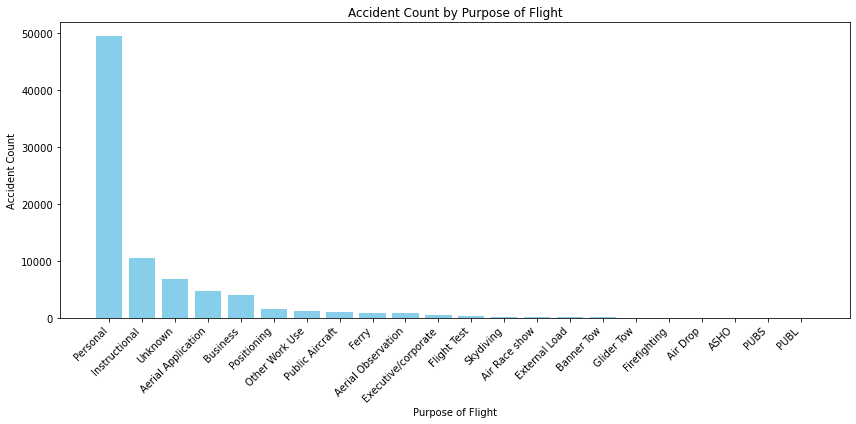

In [73]:
# Group by Purpose.of.flight and sum the accident_count for each category
accidents_by_purpose = data_df.groupby("Purpose.of.flight", as_index=False)["accident_count"].sum()

# Sort the groups in descending order by accident_count
accidents_by_purpose.sort_values("accident_count", ascending=False, inplace=True)

# Plot a bar chart
plt.figure(figsize=(12,6))
plt.bar(accidents_by_purpose["Purpose.of.flight"], accidents_by_purpose["accident_count"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Purpose of Flight")
plt.ylabel("Accident Count")
plt.title("Accident Count by Purpose of Flight")
plt.tight_layout()
plt.show()


In the same Operational analysis I looked into the broad phase of flight, which provides info on the phase of flight that the accident occurred. This was done with reference to the accident count to find the phase of flight with high accident occurences.
This info will allow for proper traing in the specific areas namely landing, takeoff cruising etc to ensure special care is taken during these phases and also a regiment for more training for operators on these phases to ensure that the risks would be reduced.

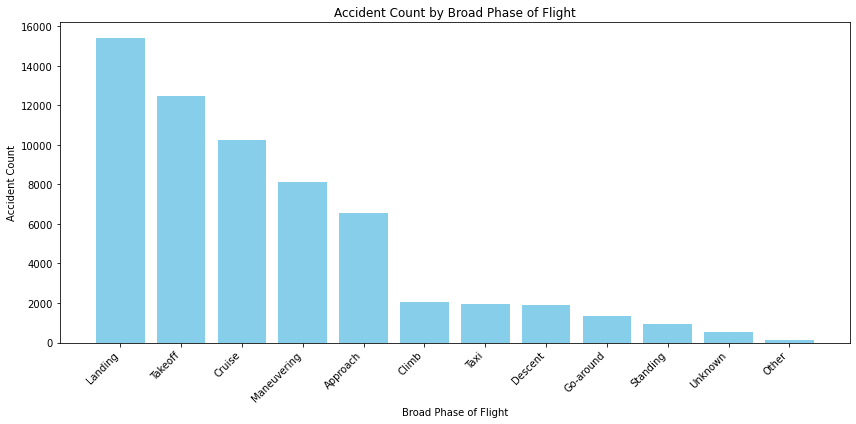

In [74]:
# Group the data by Broad.phase.of.flight and sum the accident counts
phase_accidents = data_df.groupby("Broad.phase.of.flight", as_index=False)["accident_count"].sum()

# Optionally, sort by accident count in descending order to see the phases with the most accidents first
phase_accidents.sort_values("accident_count", ascending=False, inplace=True)

# Plot a bar chart
plt.figure(figsize=(12,6))
plt.bar(phase_accidents["Broad.phase.of.flight"], phase_accidents["accident_count"], color='skyblue')
plt.xlabel("Broad Phase of Flight")
plt.ylabel("Accident Count")
plt.title("Accident Count by Broad Phase of Flight")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###  Plane Characteristics

The next step would to look into the plane characteristics that were provided in the data from the National Transportation Safety Board being the Amateur built status, Engine type and No of engines.
Analyzed all three characteristics separately and according to the accident count, whilst using the beforementioned top 20 list according to survival rate.
This would allow to know the specific recipe of characteristics that appear in the top 20 list that ultimstely lead to high survival rate.

On checking on the Amateur Built status it was noted predominantly that planes that were **NOT** amateur built are the only ones that appear. 

<Figure size 864x504 with 0 Axes>

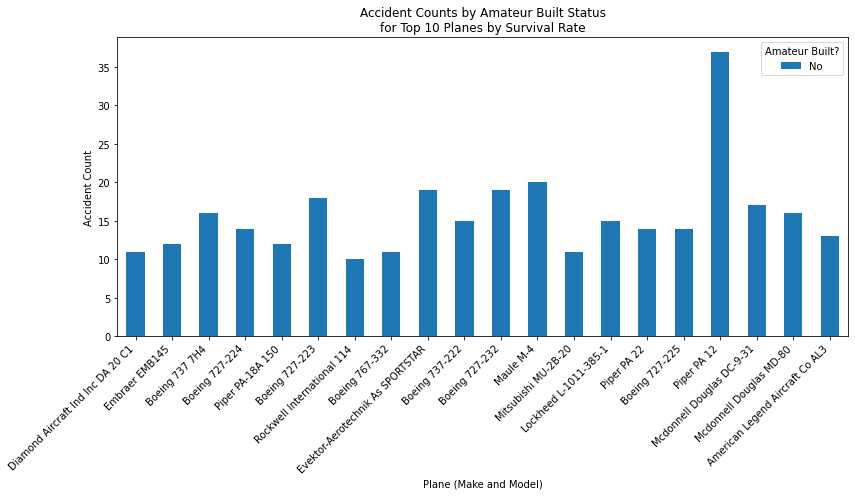

In [75]:
# Group by Plane and Amateur Built and sum the accident_count
grouped_amateur = top20_data.groupby(["Plane", "Amateur Built"], as_index=False)["accident_count"].sum()

# Pivot the table so that rows are Plane and columns are the two Amateur Built categories
pivot_amateur = grouped_amateur.pivot(index="Plane", columns="Amateur Built", values="accident_count").fillna(0)

# Reorder rows to match the order in your top10_survival DataFrame
pivot_amateur = pivot_amateur.reindex(top20_planes)

# Plot a stacked bar chart
plt.figure(figsize=(12,7))
pivot_amateur.plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel("Plane (Make and Model)")
plt.ylabel("Accident Count")
plt.title("Accident Counts by Amateur Built Status\nfor Top 10 Planes by Survival Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Looking into the Engine Type it was noted that the **Turbo Fan** engine type appeared more in the top 20 list.

<Figure size 864x504 with 0 Axes>

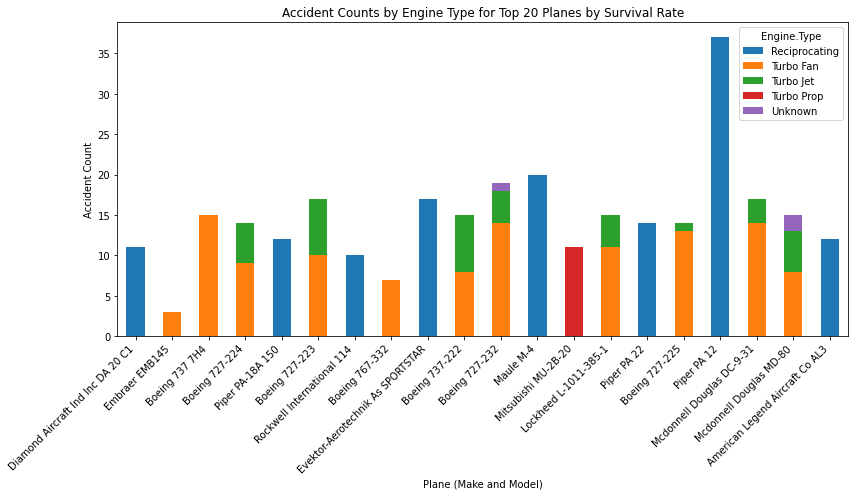

In [77]:
# Group by Plane and Engine.Type and sum the accident counts.
grouped_engine = filtered_data.groupby(["Plane", "Engine.Type"], as_index=False)["accident_count"].sum()

# Pivot the table so that each row is a Plane and each column is an Engine.Type.
pivot_engine = grouped_engine.pivot(index="Plane", columns="Engine.Type", values="accident_count").fillna(0)

# Reorder the rows to match the order in your top20_survival DataFrame.
pivot_engine = pivot_engine.reindex(top20_planes)

# Plot a stacked bar chart.
plt.figure(figsize=(12,7))
pivot_engine.plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel("Plane (Make and Model)")
plt.ylabel("Accident Count")
plt.title("Accident Counts by Engine Type for Top 20 Planes by Survival Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Looking into the Number of Engines in the top 20 list it is noted that planes with 1 engine appear more in the list.

<Figure size 864x504 with 0 Axes>

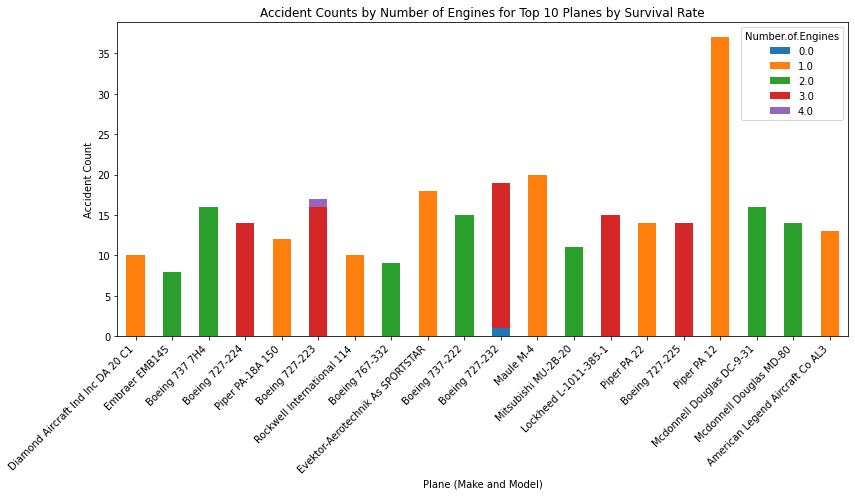

In [78]:

# Group by Plane and Number.of.Engines and sum the accident_count for each group.
grouped_engines = filtered_data.groupby(["Plane", "Number.of.Engines"], as_index=False)["accident_count"].sum()

# Pivot the table so that rows are Plane and columns are different values of Number.of.Engines.
pivot_engines = grouped_engines.pivot(index="Plane", columns="Number.of.Engines", values="accident_count").fillna(0)

# Reorder the rows to match the order of your top10_survival list.
pivot_engines = pivot_engines.reindex(top20_planes)

# Plot a stacked bar chart
plt.figure(figsize=(12,7))
pivot_engines.plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel("Plane (Make and Model)")
plt.ylabel("Accident Count")
plt.title("Accident Counts by Number of Engines for Top 20 Planes by Survival Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Time Trend Analysis

This was done to look at the trend of no of accident that occurred over the years and to notice if there was anything noticeable.
There was a large increase spike in accident count after 1980 but onward from there there has seen a downward decline with slight uptake but the trend seems to going on the downward spiral which is a nice indicator on safety status increasing.

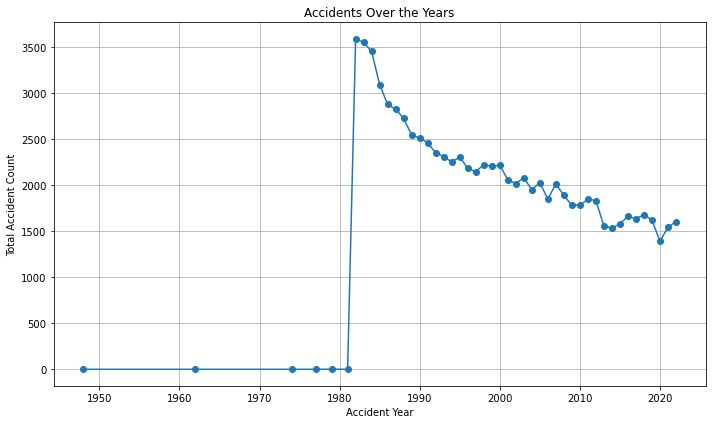

In [103]:
# Group data by Accident_Year and sum the accident_count
accidents_by_year = data_df.groupby("Accident_Year", as_index=False)["accident_count"].sum()

#Filter out values that are 0 otherwise uknown
accidents_by_year = accidents_by_year[accidents_by_year["accident_count"] > 0]
accidents_by_year = accidents_by_year.sort_values("Accident_Year")

# Plot a time series line chart
plt.figure(figsize=(10,6))
plt.plot(accidents_by_year["Accident_Year"], accidents_by_year["accident_count"], marker='o', linestyle='-')
plt.xlabel("Accident Year")
plt.ylabel("Total Accident Count")
plt.title("Accidents Over the Years")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

The analysis yielded the following recommendations:

   1. A top 20 list of possible planes that have very high survival rates that would offer low risk in the event of any incidents.
   2. A metric for Flight Purposes with high accident counts that would offer high risk. This gives the company an opportunity to make a decision on the specific business/purpose of the aviation venture.
   3. Provided with the phases of the flight process that had high accident counts this will allow for operations streamlining. Ensuring that the phases have proper safety checks and also increased training to ensure incidents do not occur.
   4. Analysis also looked into the plane characteristics that appear dominantly in the top 20 list being: **Not** amateur built, **Turbo Fan** engine and one engine. this would offer a good criteria when undergoingthe plane acquisition process.
   5. The time series plot shows a downward trend in the number of accidents that occurred. This shows a reduction in the risk factor for plane accidents and offers great projections as future advancements continue to come up.

### Next Step

1. The need to analyse these data according to fiscal data meaning pricing, insurance, rents would help push the model to be able to come up with clear and consice acquisition model that would incoporate safety and also financial viability.
2. It would also be advisable to look into the possible competitors to find info on possible income to find a risk-income tradeoff.